In [1]:
# reading data
import pandas as pd
# Save file
from pandas import ExcelWriter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
import numpy as np

In [3]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Importing tree, Pipeline, GridSearchCV from sklearn
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [5]:
from sklearn.metrics import make_scorer,f1_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [6]:
from sklearn.inspection import permutation_importance

In [7]:
import haversine
from math import radians, cos, sin, asin, sqrt

In [8]:
import re

In [9]:
%matplotlib inline

# Part - 1. Data Acquisition  & Data Cleaning 

## Understand empty values

In [10]:
def view_empty_values(df: pd.DataFrame) -> pd.DataFrame:
    """
    Displays the count and % of empty values in a dataframe.
    """
    res = pd.concat([df.dtypes, df.isnull().sum(), df.isnull().sum() / len(df)], axis=1)
    res.columns = ["Dtype", "Count of missing", "% of missing"]
    return res

## 1. Reading the Facilities dataset

In [11]:
df_facility = pd.read_csv("dataset/Facilities.txt", error_bad_lines=False, delimiter= '|')
print(df_facility.shape)
df_facility.head(2)

(32, 7)


,Facility_Name,Facility_Location_Code,Facility_Type_Of_Facility,Facility_Hospital_Designation_List,Facility_Latitude,Facility_Longitude,Facility_Full_Address
0,Novant Health UVA Haymarket Medical Center,216,Free Standing Emergency Room,Hospital (General),38.423916,77.401647,"15225 Heathcote Blvd, Haymarket, Virginia, 201..."
1,Kaiser Permanente - Tysons Corner - Advanced U...,700,Free Standing Emergency Room,NaN,38.929137,77.224601,"8008 Westpark Drive, McLean, Virginia, 22102, ..."


In [12]:
view_empty_values(df_facility)

,Dtype,Count of missing,% of missing
Facility_Name,object,0,0.00000
Facility_Location_Code,int64,0,0.00000
Facility_Type_Of_Facility,object,2,0.06250
Facility_Hospital_Designation_List,object,7,0.21875
Facility_Latitude,float64,3,0.09375
Facility_Longitude,float64,3,0.09375
Facility_Full_Address,object,0,0.00000


## 2. Handling the null values of Facilities dataset

In [13]:
df_facility.isnull().sum().sort_values()

Facility_Name                         0
Facility_Location_Code                0
Facility_Full_Address                 0
Facility_Type_Of_Facility             2
Facility_Latitude                     3
Facility_Longitude                    3
Facility_Hospital_Designation_List    7
dtype: int64

#### 2.a. Feature - Facility Latitude, Longitude 

In [14]:
# Replacing null values for facility_latitude and longitude with 0
df_facility.Facility_Latitude.fillna(0, inplace=True)
df_facility.Facility_Longitude.fillna(0, inplace=True)

In [15]:
df_facility.Facility_Name.unique()

array(['Novant Health UVA Haymarket Medical Center',
       'Kaiser Permanente - Tysons Corner - Advanced Urgent Care',
       'Landing Zone / Non-Hospital', 'MWHC Stafford Hospital',
       'Kaiser Permanente - Woodbridge - Advanced Urgent Care',
       'Merrifield Mental Health',
       'Walter Reed National Military Medical Center',
       'Suburban Hospital', 'Landing Zone', 'Inova Mount Vernon Hospital',
       'MedStar Southern Maryland Hospital Center',
       'Inova HealthPlex - Ashburn', "Children's National Medical Center",
       'Sibley Memorial Hospital',
       'Inova Emergency Care Center - Reston/Herndon',
       'George Washington University Hospital',
       'Novant Health UVA Prince William Medical Center',
       'Inova Alexandria Hospital',
       'Inova HealthPlex - Franconia/Springfield',
       'Inova Fairfax Hospital', 'HCA StoneSprings Hospital Center',
       'Inova Healthplex - Lorton',
       ' Sentara Northern Virginia Medical Center',
       'Fort Belvoir

#### Referred hospital description for filling missing values


|  Facility_Name  | Facility_Hospital_Designation_List | Check with partners |
| --- | --- | --- |
| Landing Zone / Non-Hospital	 | non hospital | Confirmed |
|Kaiser Permanente - Tysons Corner - Advanced U...|Hospital General | Confirmed |
|MedStar Southern Maryland Hospital Center | Hospital(General), Burns, Stroke, trauma | Confirmed|
|HCA StoneSprings Hospital Center|Hospital General | Confirmed|
|Out Of Area Hospital Not Listed	 | Hospital General  |Confirmed|

#### 2.b. Feature - Facility_Hospital_Designation_List

In [16]:
# Confirmation with partners and speciality for hospital in google the following values were replaced
df_facility.loc[ df_facility['Facility_Name'].isin(['Kaiser Permanente - Tysons Corner - Advanced Urgent Care','Kaiser Permanente - Woodbridge - Advanced Urgent Care','HCA StoneSprings Hospital Center', 'Out Of Area Hospital Not Listed']), 'Facility_Hospital_Designation_List'] = 'Hospital(General)'

In [17]:

df_facility.loc[ df_facility['Facility_Name'].isin(['Landing Zone / Non-Hospital','Landing Zone']), 'Facility_Hospital_Designation_List'] = 'Non Hospital'

In [18]:

df_facility.loc[ df_facility['Facility_Name'].isin(['MedStar Southern Maryland Hospital Center']), 'Facility_Hospital_Designation_List'] = 'Hospital(General), Burns, Stroke, trauma'

#### 2.c. Feature - Facility_Type_Of_Facility

In [19]:
# Replacing null values for facility_type  with 'Non hospital service'
df_facility.Facility_Type_Of_Facility.fillna('Non hospital service', inplace=True)

In [20]:
# All  null values in facility dataset were handled
df_facility.isnull().sum().sort_values()

Facility_Name                         0
Facility_Location_Code                0
Facility_Type_Of_Facility             0
Facility_Hospital_Designation_List    0
Facility_Latitude                     0
Facility_Longitude                    0
Facility_Full_Address                 0
dtype: int64

In [21]:
df_facility['Facility_Name'].unique()

array(['Novant Health UVA Haymarket Medical Center',
       'Kaiser Permanente - Tysons Corner - Advanced Urgent Care',
       'Landing Zone / Non-Hospital', 'MWHC Stafford Hospital',
       'Kaiser Permanente - Woodbridge - Advanced Urgent Care',
       'Merrifield Mental Health',
       'Walter Reed National Military Medical Center',
       'Suburban Hospital', 'Landing Zone', 'Inova Mount Vernon Hospital',
       'MedStar Southern Maryland Hospital Center',
       'Inova HealthPlex - Ashburn', "Children's National Medical Center",
       'Sibley Memorial Hospital',
       'Inova Emergency Care Center - Reston/Herndon',
       'George Washington University Hospital',
       'Novant Health UVA Prince William Medical Center',
       'Inova Alexandria Hospital',
       'Inova HealthPlex - Franconia/Springfield',
       'Inova Fairfax Hospital', 'HCA StoneSprings Hospital Center',
       'Inova Healthplex - Lorton',
       ' Sentara Northern Virginia Medical Center',
       'Fort Belvoir

In [22]:
df_facility['Facility_Location_Code'].unique()

array([216, 700, 107, 116, 701, 106, 386, 385, 999,  47, 363, 364, 327,
       326, 204, 324,  59,   1, 205,  16, 215, 213,  58, 374,   3, 325,
       328,  36, 102,  95, 202,  11], dtype=int64)

## 3. Reading the IndividualTables dataset - incidents, units, patients, procedures, medications

In [23]:
# Attributes of incident
incidents = pd.read_excel("dataset/IndividualTables.xlsx", sheet_name="incidents")
incidents.shape

(122746, 10)

In [24]:
# Units that responded to an incident
units = pd.read_excel("dataset/IndividualTables.xlsx", sheet_name="units")
units.shape

(280156, 7)

In [25]:
# Patient affected in the incident 
patients = pd.read_excel("dataset/IndividualTables.xlsx", sheet_name="patients")
patients.shape

(125147, 13)

In [26]:
# procedures followed by the incident 
procedures = pd.read_excel("dataset/IndividualTables.xlsx", sheet_name="procedures")
procedures.shape

(121338, 4)

In [27]:
# medications followed by the incident 
medications = pd.read_excel("dataset/IndividualTables.xlsx", sheet_name="medications")
medications.shape

(46916, 4)

In [28]:
# added latitude longitude based on the units 
units_latlon =  pd.read_excel("dataset/IndividualTables.xlsx", sheet_name="latlonunits")

In [29]:
# Merge units with the units_latlon based on unitID
print(units.shape, units_latlon.shape)
unitsmerge = units.merge(units_latlon, how="inner", on="UnitStation")
unitsmerge.shape

(280156, 7) (46, 3)


(289634, 9)

## 4. Handling null values - Individuals dataset

In [30]:
unitsmerge["UnitStation"].unique()

array([1, 2, 34, 4, 31, 36, 5, 37, 11, 22, 26, 35, 8, 30, 10, 14, 18, 9,
       24, 28, 12, 39, 13, 29, 41, 32, 27, 23, 15, 21, 40, 17, 25, 38, 16,
       19, 20, 42, 33, 3], dtype=object)

In [31]:
unitsmerge.columns

Index(['PrimaryKey', 'ResponseUnitID', 'UnitPrimaryActionTaken',
       'UnitOtherActionsTaken', 'UnitStation', 'UnitType', 'UnitArrivalOrder',
       'Unit_LAT', 'Unit_LON'],
      dtype='object')

In [32]:
view_empty_values(incidents)

,Dtype,Count of missing,% of missing
PrimaryKey,int64,0,0.000000
CallConfirmedDT,datetime64[ns],0,0.000000
ShiftDay,object,0,0.000000
TourOfShift,int64,0,0.000000
IncidentFirstDue,float64,14,0.000114
InitialIncidentType,object,0,0.000000
DispatchedIncidentType,object,0,0.000000
ArrivedIncidentType,object,392,0.003194
FinalIncidentType,object,0,0.000000
FinalIncidentTypeDescription,object,43,0.000350


In [33]:
# there are very few missing values in the data so we can drop these records
incidents.dropna(inplace=True)
incidents.shape

(122298, 10)

In [34]:
# are there duplicated Incidents
incidents.PrimaryKey.nunique() / len(incidents)

0.9999672930056093

In [35]:
incidents[incidents.PrimaryKey.duplicated(keep=False)].sort_values("PrimaryKey")

,PrimaryKey,CallConfirmedDT,ShiftDay,TourOfShift,IncidentFirstDue,InitialIncidentType,DispatchedIncidentType,ArrivedIncidentType,FinalIncidentType,FinalIncidentTypeDescription
5583,9934140833,2018-08-10 22:51:12,C,2,414.0,ACCIF,ACCIF,ACCIF,ACCIF,ACCIDENT W/INJ
5584,9934140833,2018-08-10 22:51:12,C,2,414.0,ALS,ALS,ALS,ALS,ALS EMERGENCY
64506,11194080439,2019-10-06 18:40:09,B,3,408.0,ACCIF,ACCIF,ACCIF,ACCIF,ACCIDENT W/INJ
64507,11194080439,2019-10-06 18:40:09,B,3,408.0,ACCIMF,ACCIMF,ACCIMF,ACCIMF,ACCIDENT W/INJ - MEDIC REQ
67223,11244338761,2019-10-26 02:47:26,C,2,433.0,ASLTWF,ASLTWF,ASLTWF,ASLTWF,ASSAULT W/WEAPON
67224,11244338761,2019-10-26 02:47:26,C,2,433.0,MEDICAL,MEDICAL,MEDICAL,MEDICAL,MEDICAL EMERGENCY
102246,11964264456,2020-07-24 22:15:51,A,2,426.0,ACCIF,ACCIF,ACCIF,ACCIF,ACCIDENT W/INJ
102247,11964264456,2020-07-24 22:15:51,A,2,426.0,ACCITF,ACCITF,ACCITF,ACCIF,ACCIDENT W/INJ


In [36]:
# Dropping duplicates records in incidents dataset
incidents.drop_duplicates(subset=["PrimaryKey"], keep=False, inplace=True)
incidents.shape

(122290, 10)

In [37]:
view_empty_values(unitsmerge)

,Dtype,Count of missing,% of missing
PrimaryKey,int64,0,0.000000
ResponseUnitID,object,0,0.000000
UnitPrimaryActionTaken,object,38,0.000131
UnitOtherActionsTaken,object,183124,0.632260
UnitStation,object,0,0.000000
UnitType,object,0,0.000000
UnitArrivalOrder,float64,25847,0.089240
Unit_LAT,float64,0,0.000000
Unit_LON,float64,0,0.000000


|Column|Missing Value|%missing|Assumed meaning of missing value|
|----|----|----|----|
|UnitOtherActionsTaken|179609|63%|Combine both 'UnitPrimaryActionTaken' and 'UnitOtherActionTaken' |
|UnitStation|49|0.017%|We can drop these values|
|UnitArrivalOrder|26135|9%|No unit arrived- replace with 0|
|UnitTransportedDT|157474|55%|Unit was not transported?|
|UnitTransportedArrivalDT|158333|55%|Unit was not transported?|



|Column|Missing Value|%missing|Assumend meaning|
|----|----|----|----|
|||||
|||||
|||||
|||||

#### 4.a. Handling null values - units dataset

In [38]:
 # Replaced all the null values of 'UnitArrivalOrder' column with value '0' because No unit arrived
unitsmerge['UnitArrivalOrder'].fillna(0, inplace = True)

In [39]:
# Replaced all the null values of 'UnitOtherActionsTaken' column with 'No other action taken' because the no other action was taken
unitsmerge['UnitOtherActionsTaken'].fillna('No other action taken', inplace = True)

In [40]:
# Replaced all the null values of 'UnitPrimaryActionTaken' column with 'No other action taken' because the no  action was taken
unitsmerge['UnitPrimaryActionTaken'].fillna('No action taken', inplace = True)

In [41]:
# Dropping remaining empty values
print(unitsmerge.shape)
unitsmerge.dropna(inplace=True)
unitsmerge.shape

(289634, 9)


(289634, 9)

In [42]:
view_empty_values(unitsmerge)

,Dtype,Count of missing,% of missing
PrimaryKey,int64,0,0.0
ResponseUnitID,object,0,0.0
UnitPrimaryActionTaken,object,0,0.0
UnitOtherActionsTaken,object,0,0.0
UnitStation,object,0,0.0
UnitType,object,0,0.0
UnitArrivalOrder,float64,0,0.0
Unit_LAT,float64,0,0.0
Unit_LON,float64,0,0.0


#### 4.b. Handling null values - patients dataset

In [43]:
view_empty_values(patients)

,Dtype,Count of missing,% of missing
PrimaryKey,int64,0,0.000000
PatientID,int64,0,0.000000
TransportUnitID,object,0,0.000000
UnitTransportedDT,datetime64[ns],871,0.006960
UnitTransportedArrivalDT,datetime64[ns],1390,0.011107
TransportLOC,object,478,0.003820
TransportHospitalCode,float64,481,0.003843
TransportHospitalName,object,481,0.003843
ReasonForChoosingHospital,object,480,0.003835
PatientAge,object,2,0.000016


In [44]:
# Replaced all the null values of 'UnitTransportedDT' column with 00:00:0 because the Unit was not transported
patients['UnitTransportedDT'].fillna('00:00:0', inplace = True)

In [45]:
# Replaced all the null values of 'UnitTransportedArrivalDT' column with 00:00:0 because the Unit was not transported
patients['UnitTransportedArrivalDT'].fillna('00:00:0', inplace = True)

In [46]:
# Replaced all the null values of 'TransportHospitalName' column with 'No Hospital service'
patients['TransportHospitalCode'].fillna('No Hospital service', inplace = True)

In [47]:
## Replaced all the null values of 'TransportHospitalCode' column with 'No Hospital name'
patients['TransportHospitalName'].fillna('No Hospital name', inplace = True)

In [48]:
# Replaced all the null values of 'ReasonForChoosingHospital' column with 'No Hospital service'
patients['ReasonForChoosingHospital'].fillna('No Hospital service', inplace = True)

In [49]:
# Replaced all the null values of 'TransportLOC' column with '0'
patients['TransportLOC'].fillna('0', inplace = True)

In [50]:
view_empty_values(patients)

,Dtype,Count of missing,% of missing
PrimaryKey,int64,0,0.000000
PatientID,int64,0,0.000000
TransportUnitID,object,0,0.000000
UnitTransportedDT,object,0,0.000000
UnitTransportedArrivalDT,object,0,0.000000
TransportLOC,object,0,0.000000
TransportHospitalCode,object,0,0.000000
TransportHospitalName,object,0,0.000000
ReasonForChoosingHospital,object,0,0.000000
PatientAge,object,2,0.000016


In [51]:
# Dropping remaining empty values in patients dataset
print(patients.shape)
patients.dropna(inplace=True)
patients.shape

(125147, 13)


(125143, 13)

#### 4.c. Handling null values - procedures dataset

In [52]:
view_empty_values(procedures)

,Dtype,Count of missing,% of missing
PatientID,int64,0,0.0
ProcedurePrimaryKey,int64,0,0.0
ProcedurePerformed,object,0,0.0
isALS_LOC,int64,0,0.0


#### 4.d. Handling null values - medications dataset

In [53]:
view_empty_values(medications)

,Dtype,Count of missing,% of missing
PatientID,int64,0,0.000000
MedicationPrimaryKey,int64,0,0.000000
MedicationGiven,object,5,0.000107
isALS_LOC,int64,0,0.000000


In [54]:
# Replaced all the null values of 'MedicationGiven' column with 'No medication given'
medications['MedicationGiven'].fillna('No medication given', inplace = True)

In [55]:
# Save cleaned data to file
writer = ExcelWriter("dataset/IndividualTablesCleaned.xlsx")
incidents.to_excel(writer, "incidents", index=False)
unitsmerge.to_excel(writer, "units", index=False)
patients.to_excel(writer, "patients", index=False)
procedures.to_excel(writer, "procedures", index=False)
medications.to_excel(writer, "medications", index=False)
writer.save()

# Part - 2. Data Modeling 

In [56]:
# Read cleaned data
incidents = pd.read_excel("dataset/IndividualTablesCleaned.xlsx", sheet_name="incidents")
units = pd.read_excel("dataset/IndividualTablesCleaned.xlsx", sheet_name="units")
patients = pd.read_excel("dataset/IndividualTablesCleaned.xlsx", sheet_name="patients")
procedures = pd.read_excel("dataset/IndividualTablesCleaned.xlsx", sheet_name="procedures")
medications = pd.read_excel("dataset/IndividualTablesCleaned.xlsx", sheet_name="medications")

In [57]:
# Function to calculate haversine distance 
def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Calculate the haversine distance
    Use radius of earth 6371 in km 3956 in miles 
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956 # Radius of earth in miles
    distance = c * r
    return distance

## 1. Data Preprocessing 

In [58]:
# Merge patients with the units - Units 0:many patients
print(patients.shape, units.shape)
patientunitsmerge = patients.merge(units, left_on=["PrimaryKey", "TransportUnitID"],  right_on= ["PrimaryKey", "ResponseUnitID"])
patientunitsmerge.shape

(125143, 13) (289634, 9)


(129313, 21)

In [59]:
# Merge patientunit with the incidents - incidents 0:many patients
print(patientunitsmerge.shape, incidents.shape)
incidentpatientunitsmerge = patientunitsmerge.merge(incidents, how="left", on="PrimaryKey")
incidentpatientunitsmerge.shape

(129313, 21) (122290, 10)


(129313, 30)

In [60]:
incidentpatientunitsmerge.columns

Index(['PrimaryKey', 'PatientID', 'TransportUnitID', 'UnitTransportedDT',
       'UnitTransportedArrivalDT', 'TransportLOC', 'TransportHospitalCode',
       'TransportHospitalName', 'ReasonForChoosingHospital', 'PatientAge',
       'PrimaryImpression', 'SecondaryImpression', 'PatientDisposition',
       'ResponseUnitID', 'UnitPrimaryActionTaken', 'UnitOtherActionsTaken',
       'UnitStation', 'UnitType', 'UnitArrivalOrder', 'Unit_LAT', 'Unit_LON',
       'CallConfirmedDT', 'ShiftDay', 'TourOfShift', 'IncidentFirstDue',
       'InitialIncidentType', 'DispatchedIncidentType', 'ArrivedIncidentType',
       'FinalIncidentType', 'FinalIncidentTypeDescription'],
      dtype='object')

In [61]:
# Replacing TransportHospitalCode == No Hospital service' with 111
incidentpatientunitsmerge.loc[incidentpatientunitsmerge['TransportHospitalCode'] == 'No Hospital service', 'TransportHospitalCode'] = 111
incidentpatientunitsmerge['TransportHospitalCode'] = incidentpatientunitsmerge['TransportHospitalCode'].astype(int)

In [62]:
# Merge incidentpatientunitsmerge with the facility 
print(incidentpatientunitsmerge.shape, df_facility.shape)
incidentpatientunitsfacilitiesmerge = incidentpatientunitsmerge.merge(df_facility, how="left", left_on="TransportHospitalCode" , right_on="Facility_Location_Code")
incidentpatientunitsfacilitiesmerge.shape

(129313, 30) (32, 7)


(129313, 37)

In [63]:
# Drop 'Facility_Location_Code'
incidentpatientunitsfacilitiesmerge = incidentpatientunitsfacilitiesmerge.drop(columns= ['Facility_Location_Code'])

In [64]:
incidentpatientunitsfacilitiesmerge.head(5)

,PrimaryKey,PatientID,TransportUnitID,UnitTransportedDT,UnitTransportedArrivalDT,TransportLOC,TransportHospitalCode,TransportHospitalName,ReasonForChoosingHospital,PatientAge,...,DispatchedIncidentType,ArrivedIncidentType,FinalIncidentType,FinalIncidentTypeDescription,Facility_Name,Facility_Type_Of_Facility,Facility_Hospital_Designation_List,Facility_Latitude,Facility_Longitude,Facility_Full_Address
0,9804015371,640838,M401,2018-07-01 02:47:55,2018-07-01 03:06:39,Level 3: 1 Provider (ALS Care),3,Virginia Hospital Center,"Patient's Choice,Closest Facility",80 - 89,...,ALS,ALS,ALS,ALS EMERGENCY,Virginia Hospital Center,Hospital,"Designated Stroke Center,Hospital (General),Pe...",38.889271,77.126523,"1701 N. George Mason Drive, Arlington, Virgin..."
1,9804016046,641032,M401,2018-07-01 11:44:54,2018-07-01 11:55:05,Level 4: 1 Provider (BLS Care),3,Virginia Hospital Center,Patient's Choice,80 - 89,...,BLS,BLS,BLS,BLS EMERGENCY,Virginia Hospital Center,Hospital,"Designated Stroke Center,Hospital (General),Pe...",38.889271,77.126523,"1701 N. George Mason Drive, Arlington, Virgin..."
2,9804018610,641839,M401,2018-07-02 09:54:49,2018-07-02 10:08:54,Level 4: 1 Provider (BLS Care),16,Fairfax Hospital,Closest Facility,40 - 49,...,BLS,BLS,BLS,BLS EMERGENCY,Inova Fairfax Hospital,Hospital,"Designated Stroke Center,Hospital (General),Le...",38.857392,77.226309,"3300 Gallows Road, West Falls Church, Virginia..."
3,9804018946,641959,M401,2018-07-02 11:41:42,2018-07-02 12:08:36,Level 4: 1 Provider (BLS Care),3,Virginia Hospital Center,"Closest Facility,Family Choice,Patient's Physi...",80 - 89,...,BLS,BLS,BLS,BLS EMERGENCY,Virginia Hospital Center,Hospital,"Designated Stroke Center,Hospital (General),Pe...",38.889271,77.126523,"1701 N. George Mason Drive, Arlington, Virgin..."
4,9804019337,642086,M401,2018-07-02 14:21:28,2018-07-02 14:33:41,Level 3: 1 Provider (ALS Care),3,Virginia Hospital Center,"Closest Facility,Patient's Physician's Choice",20 - 29,...,ALS,ALS,ALS,ALS EMERGENCY,Virginia Hospital Center,Hospital,"Designated Stroke Center,Hospital (General),Pe...",38.889271,77.126523,"1701 N. George Mason Drive, Arlington, Virgin..."


In [65]:
# Outcome variable
incidentpatientunitsfacilitiesmerge["TransportHospitalName"].nunique()

43

In [66]:
# Categorical data types
incidentpatientunitsfacilitiesmerge.select_dtypes(exclude=['int64','int','int32','float','datetime64[ns]']).columns

Index(['TransportUnitID', 'UnitTransportedDT', 'UnitTransportedArrivalDT',
       'TransportLOC', 'TransportHospitalName', 'ReasonForChoosingHospital',
       'PatientAge', 'PrimaryImpression', 'SecondaryImpression',
       'PatientDisposition', 'ResponseUnitID', 'UnitPrimaryActionTaken',
       'UnitOtherActionsTaken', 'UnitType', 'ShiftDay', 'InitialIncidentType',
       'DispatchedIncidentType', 'ArrivedIncidentType', 'FinalIncidentType',
       'FinalIncidentTypeDescription', 'Facility_Name',
       'Facility_Type_Of_Facility', 'Facility_Hospital_Designation_List',
       'Facility_Full_Address'],
      dtype='object')

In [67]:
# Unique values for 'TransportLOC'
incidentpatientunitsfacilitiesmerge.TransportLOC.unique()

array(['Level 3: 1 Provider (ALS Care)', 'Level 4: 1 Provider (BLS Care)',
       'Level 1: 3 or More Providers (ALS Care)',
       'Level 2: 2 Providers (ALS Care)', '0'], dtype=object)

In [68]:
incidentpatientunitsfacilitiesmerge["UnitStation"].unique()

array([ 1,  2, 34,  4, 36,  5, 37, 26,  8, 30, 10,  9, 24, 28, 11, 12, 39,
       13, 41, 32, 14, 27, 23, 15, 21, 17, 16, 38, 18, 19, 20, 22, 40, 35,
       25, 29, 42, 31], dtype=int64)

In [69]:
# TourOfShift: is categorical so converting it to string
incidentpatientunitsfacilitiesmerge["TourOfShift"] = incidentpatientunitsfacilitiesmerge.TourOfShift.astype(str)

In [70]:
# IncidentFirstDue is within or outside fairfax so converting it to dummy
incidentpatientunitsfacilitiesmerge.IncidentFirstDue.fillna(0, inplace=True)
# df.loc[df['First season'] > 1990, 'First Season'] = 1
incidentpatientunitsfacilitiesmerge.loc[incidentpatientunitsfacilitiesmerge.IncidentFirstDue != 0, "IncidentFirstDue"] =1

In [71]:
view_empty_values(incidentpatientunitsfacilitiesmerge)

,Dtype,Count of missing,% of missing
PrimaryKey,int64,0,0.000000
PatientID,int64,0,0.000000
TransportUnitID,object,0,0.000000
UnitTransportedDT,object,0,0.000000
UnitTransportedArrivalDT,object,0,0.000000
TransportLOC,object,0,0.000000
TransportHospitalCode,int32,0,0.000000
TransportHospitalName,object,0,0.000000
ReasonForChoosingHospital,object,0,0.000000
PatientAge,object,0,0.000000


In [72]:
# Dropping few nulls values present in incidentpatientunitsfacilitiesmerge dataset
incidentpatientunitsfacilitiesmerge.dropna(inplace=True)
incidentpatientunitsfacilitiesmerge.shape

(127624, 36)

In [73]:
incidentpatientunitsfacilitiesmerge.columns

Index(['PrimaryKey', 'PatientID', 'TransportUnitID', 'UnitTransportedDT',
       'UnitTransportedArrivalDT', 'TransportLOC', 'TransportHospitalCode',
       'TransportHospitalName', 'ReasonForChoosingHospital', 'PatientAge',
       'PrimaryImpression', 'SecondaryImpression', 'PatientDisposition',
       'ResponseUnitID', 'UnitPrimaryActionTaken', 'UnitOtherActionsTaken',
       'UnitStation', 'UnitType', 'UnitArrivalOrder', 'Unit_LAT', 'Unit_LON',
       'CallConfirmedDT', 'ShiftDay', 'TourOfShift', 'IncidentFirstDue',
       'InitialIncidentType', 'DispatchedIncidentType', 'ArrivedIncidentType',
       'FinalIncidentType', 'FinalIncidentTypeDescription', 'Facility_Name',
       'Facility_Type_Of_Facility', 'Facility_Hospital_Designation_List',
       'Facility_Latitude', 'Facility_Longitude', 'Facility_Full_Address'],
      dtype='object')

In [74]:
# haversine distance between facility and the unitstation
incidentpatientunitsfacilitiesmerge['DistanceUnitToFacility'] = incidentpatientunitsfacilitiesmerge.apply(lambda x: haversine_distance(x['Unit_LON'],x['Unit_LAT'],x['Facility_Longitude'],x['Facility_Latitude']), axis=1)

In [75]:
# Dropping highly corelated features
# InitialIncidentType	DispatchedIncidentType	ArrivedIncidentType	FinalIncidentType	FinalIncidentTypeDescription
# Highly corelated features - keeping only one makes sense
incidentpatientunitsfacilitiesmerge = incidentpatientunitsfacilitiesmerge.drop(columns= ["Unit_LAT", "Unit_LON","Facility_Latitude","Facility_Longitude","InitialIncidentType","DispatchedIncidentType","ArrivedIncidentType","FinalIncidentTypeDescription" ])

In [76]:
# Nominal values with large variance, like dates
incidentpatientunitsfacilitiesmerge = incidentpatientunitsfacilitiesmerge.drop(columns= ['UnitTransportedDT', 'UnitTransportedArrivalDT','UnitOtherActionsTaken','SecondaryImpression'])

In [77]:
# Its correlated to 'TransportUnitID_y'
incidentpatientunitsfacilitiesmerge = incidentpatientunitsfacilitiesmerge.drop(columns= ['ResponseUnitID'])

In [78]:
# Highly corelated with the TransportHospitalName
incidentpatientunitsfacilitiesmerge = incidentpatientunitsfacilitiesmerge.drop(columns= ['TransportHospitalCode'])

In [79]:
incidentpatientunitsfacilitiesmerge = incidentpatientunitsfacilitiesmerge.drop(columns= ['PrimaryKey', 'CallConfirmedDT'])
# , 'CallConfirmedDT_x', 'CallConfirmedDT_y'

In [80]:
incidentpatientunitsfacilitiesmerge.FinalIncidentType.unique()

array(['ALS', 'BLS', 'ODF', 'ACCITF', 'SHOTF', 'ACCIF', 'CPRF', 'ACCIMF',
       'ACCIHF', 'AMED', 'STABF', 'SUIAF', 'FBLDG', 'CAVEIN', 'FACCIF',
       'PSERVF', 'FOUT', 'FTH', 'GFRESCUE', 'DROWNF', 'FHIRIS', 'RTRAP',
       'ACCIBF', 'FGAPT', 'RSWIFT', 'GASIN', 'FVEHF', 'CODE1', 'ELEV',
       'RWATER', 'INVF', 'SIG1F', 'FDACCITF', 'ASLTWF', 'FHOU', 'RESCUE',
       'ALRMFD', 'FDACCIF', 'EMETROF', 'STILALRM', 'ECOD', 'HAZMAT',
       'FDACCF', 'MEDICAL', 'FTRKF', 'FDACCIMF', 'RIVERF', 'LOCKF'],
      dtype=object)

In [81]:
# Unique values in ShiftDay 
incidentpatientunitsfacilitiesmerge.ShiftDay.unique()

array(['B', 'A', 'C'], dtype=object)

In [82]:
# mapping 'PRV' to 111, Drop TA only few values
incidentpatientunitsfacilitiesmerge.UnitStation.unique()

array([ 1,  2, 34,  4, 36,  5, 37, 26,  8, 30, 10,  9, 24, 28, 11, 12, 39,
       13, 41, 32, 14, 27, 23, 15, 21, 17, 16, 38, 18, 19, 20, 22, 40, 35,
       25, 29, 42, 31], dtype=int64)

In [83]:
# Unique values in UnitType
incidentpatientunitsfacilitiesmerge.UnitType.unique()

array(['Medic', 'Ambulance', 'Engine', 'EMS Supervisor', 'Truck'],
      dtype=object)

In [84]:
# Unique values in TransportLOC
incidentpatientunitsmerge.TransportLOC.unique()

array(['Level 3: 1 Provider (ALS Care)', 'Level 4: 1 Provider (BLS Care)',
       'Level 1: 3 or More Providers (ALS Care)',
       'Level 2: 2 Providers (ALS Care)', '0'], dtype=object)

In [85]:
incidentpatientunitsmerge.TransportUnitID.unique()

array(['M401', 'M402', 'M434', 'M404', 'M436', 'M405', 'M437', 'M426',
       'M408', 'M408B', 'M430', 'M410B', 'M409B', 'M409', 'M424', 'M410',
       'M428', 'A410E', 'M411B', 'M411', 'M412', 'M439', 'M413', 'M441',
       'M432', 'M414', 'M427', 'M423', 'E415', 'M415', 'M421', 'M417',
       'M416', 'M438', 'M418', 'M419', 'M420', 'M422', 'M440', 'M435',
       'M425', 'M429', 'M442', 'M431', 'A414E', 'M401E', 'E401', 'M412E',
       'A422E', 'A402E', 'M422B', 'EMS403', 'R418', 'A421E', 'E411',
       'E439', 'A414', 'E418', 'A413E', 'E442', 'M405E', 'A402', 'TL430',
       'E440', 'A438E', 'R411', 'TL436', 'M417E', 'A405E', 'E430', 'E423',
       'TL440', 'E409', 'E402B', 'TL401', 'A417E', 'M414E', 'E428',
       'R439', 'A401E', 'A417', 'HM440', 'R401', 'E405', 'A437E', 'A422',
       'TL405', 'E417', 'M422E', 'R421', 'E402', 'E413', 'A410', 'E404',
       'E421', 'E410', 'A401', 'A408E', 'M402B', 'A412E', 'E436', 'E432',
       'T429', 'T411', 'E434', 'E437', 'E438', 'TT430', 'E4

In [86]:
# keep only numbers in TransportUnitID removing alphabet prefix
incidentpatientunitsfacilitiesmerge['TransportUnitID']  = incidentpatientunitsfacilitiesmerge['TransportUnitID'] .apply(lambda row: re.sub("[^0-9]", "", row))

In [87]:
incidentpatientunitsfacilitiesmerge.TransportUnitID.unique()

array(['401', '402', '434', '404', '436', '405', '437', '426', '408',
       '430', '410', '409', '424', '428', '411', '412', '439', '413',
       '441', '432', '414', '427', '423', '415', '421', '417', '416',
       '438', '418', '419', '420', '422', '440', '435', '425', '429',
       '442', '431'], dtype=object)

In [88]:
# explore PrimaryImpression
# t = incidentpatientunitsfacilitiesmerge.PrimaryImpression.apply(lambda s: s.split("-")[0].strip())
# incidentpatientunitsfacilitiesmerge.PrimaryImpression[t == "Neuro"].value_counts()
# incidentpatientunitsfacilitiesmerge.PrimaryImpression.apply(lambda s: s.split("-")[0]).value_counts()

In [89]:
incidentpatientunitsfacilitiesmerge.UnitType.value_counts()

Medic             125872
Ambulance           1736
Engine                13
EMS Supervisor         2
Truck                  1
Name: UnitType, dtype: int64

In [90]:
# dropping features - correlated to response
incidentpatientunitsfacilitiesmerge = incidentpatientunitsfacilitiesmerge.drop(columns= ['Facility_Name','Facility_Full_Address', 'Facility_Type_Of_Facility', "Facility_Hospital_Designation_List"])

In [91]:
# Drop ID 
incidentpatientunitsfacilitiesmerge.drop(columns= ["PatientID"], inplace=True)

In [92]:
incidentpatientunitsfacilitiesmerge.select_dtypes(exclude=['int64','int','int32','float','datetime64[ns]']).columns

Index(['TransportUnitID', 'TransportLOC', 'TransportHospitalName',
       'ReasonForChoosingHospital', 'PatientAge', 'PrimaryImpression',
       'PatientDisposition', 'UnitPrimaryActionTaken', 'UnitType', 'ShiftDay',
       'TourOfShift', 'FinalIncidentType'],
      dtype='object')

In [93]:
# Categorical data types
Feature_list = ['TransportUnitID', 'TransportLOC', 
       'ReasonForChoosingHospital', 'PatientAge', 'PrimaryImpression',
       'PatientDisposition', 'UnitPrimaryActionTaken', 'UnitType', 'ShiftDay',
       'TourOfShift', 'FinalIncidentType']


In [94]:
subset_dataframe_featurelist=[]
for variable in Feature_list:
    subset_dataframe_featurelist.append(pd.get_dummies(incidentpatientunitsfacilitiesmerge[variable],prefix=variable, dummy_na=False))

In [95]:
merged_subset_dataframe_featurelist = pd.concat(subset_dataframe_featurelist, axis=1)
merged_subset_dataframe_featurelist.shape

(127624, 609)

In [96]:
%%time
incidentpatientunitsmerged = pd.concat([merged_subset_dataframe_featurelist, incidentpatientunitsfacilitiesmerge], axis=1)
incidentpatientunitsmerged.shape

Wall time: 82.9 ms


(127624, 625)

In [97]:
# Drop nominal features already converted in numerical features using get_dummies
incidentpatientunitsmerged.drop(Feature_list, axis=1, inplace=True)
incidentpatientunitsmerged.shape

(127624, 614)

In [98]:
incidentpatientunitsmerged.head(5)

,TransportUnitID_401,TransportUnitID_402,TransportUnitID_404,TransportUnitID_405,TransportUnitID_408,TransportUnitID_409,TransportUnitID_410,TransportUnitID_411,TransportUnitID_412,TransportUnitID_413,...,FinalIncidentType_SHOTF,FinalIncidentType_SIG1F,FinalIncidentType_STABF,FinalIncidentType_STILALRM,FinalIncidentType_SUIAF,TransportHospitalName,UnitStation,UnitArrivalOrder,IncidentFirstDue,DistanceUnitToFacility
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Virginia Hospital Center,1,1,1.0,4.013841
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Virginia Hospital Center,1,1,1.0,4.013841
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Fairfax Hospital,1,2,1.0,5.756173
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Virginia Hospital Center,1,1,1.0,4.013841
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Virginia Hospital Center,1,2,1.0,4.013841


#  Model - 1 Random Forest using GridSearchCV

In [99]:
# Input variables 'X' for model 
X= incidentpatientunitsmerged.drop(columns = ['TransportHospitalName'])
X.shape

(127624, 613)

In [100]:
# Output variable 'y' for model 
y = incidentpatientunitsmerged['TransportHospitalName']

In [101]:
X.shape, y.shape

((127624, 613), (127624,))

In [102]:
# remove weird charachters in column names: https://stackoverflow.com/a/62364946/5977874
import re
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X.drop(columns="UnitType_Engine", inplace=True) # becomes duplicated

In [103]:
clfRandom_2 = RandomForestClassifier(bootstrap=True, random_state=0, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, verbose=0,
            warm_start=False)

In [104]:
pipe = Pipeline([
    ('rf', clfRandom_2)
])

In [105]:
parameters = {
    'rf__n_estimators': [10,25],
    'rf__max_depth': [5,15]
    
}

In [106]:
# Model 1
clf_GS_Model_RF2_1 = GridSearchCV(pipe, parameters, scoring=make_scorer(f1_score, average='weighted'))

In [107]:
%time clf_GS_Model_RF2_1.fit(X, y)

D:\Softwares\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Wall time: 1min 12s


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                            

In [108]:
pd.DataFrame(clf_GS_Model_RF2_1.cv_results_).sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_depth,param_rf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,5.447259,0.069538,0.512300,0.034534,15,25,"{'rf__max_depth': 15, 'rf__n_estimators': 25}",0.676126,0.659655,0.668941,0.669382,0.662435,0.667308,0.005780,1
2,2.594911,0.149602,0.333809,0.012147,15,10,"{'rf__max_depth': 15, 'rf__n_estimators': 10}",0.651187,0.639538,0.642443,0.645116,0.651374,0.645932,0.004711,2
0,1.267865,0.086927,0.335419,0.035136,5,10,"{'rf__max_depth': 5, 'rf__n_estimators': 10}",0.405199,0.383477,0.407074,0.436655,0.363598,0.399200,0.024558,3
1,2.073863,0.027892,0.437561,0.021631,5,25,"{'rf__max_depth': 5, 'rf__n_estimators': 25}",0.404676,0.344786,0.388406,0.370397,0.347154,0.371084,0.023208,4


In [109]:
# Viewing The Best Parameters
print('Best n estimator:', clf_GS_Model_RF2_1.best_estimator_.get_params()['rf__n_estimators'])
print('Best max_depth:', clf_GS_Model_RF2_1.best_estimator_.get_params()['rf__max_depth'])
print('Best min_samples_split:', clf_GS_Model_RF2_1.best_estimator_.get_params()['rf__min_samples_split'])

Best n estimator: 25
Best max_depth: 15
Best min_samples_split: 2


In [110]:
y_pred = clf_GS_Model_RF2_1.best_estimator_.predict(X)
# y_train_pred = clfRandom.predict(X_train)

f1_score(y, y_pred,average='weighted')

0.6952817291911958

In [111]:
accuracy_score(y, y_pred)

0.7453613740362315

In [112]:
print(classification_report(y,y_pred))

D:\Softwares\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                          precision    recall  f1-score   support

                                     Alexandria Hospital       1.00      0.27      0.43      6966
                                      Ashburn HealthPlex       0.00      0.00      0.00         4
                      Children's National Medical Center       0.00      0.00      0.00        36
       Children's National Medical Center (202-476-4682)       0.00      0.00      0.00        33
                                      Fair Oaks Hospital       0.97      0.65      0.78     17137
                                        Fairfax Hospital       0.62      1.00      0.77     50507
                         Fort Belvoir Community Hospital       0.00      0.00      0.00       480
                   George Washington University Hospital       0.00      0.00      0.00        19
    George Washington University Hospital (202-715-4909)       0.00      0.00      0.00        40
                   

In [113]:
clfRandom_best = RandomForestClassifier(bootstrap=True, random_state=0, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, verbose=0,
            warm_start=False)

In [114]:
%time clfRandom_best.fit(X, y)

Wall time: 6.87 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [115]:
prob = clfRandom_best.predict_proba(X)
pred = clfRandom_best.predict(X)

Text(0.5, 0, 'Random Forest Feature Importance')

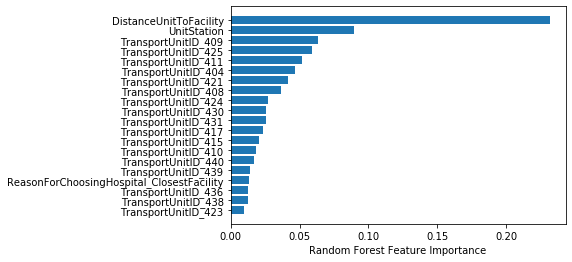

In [116]:
sorted_idx = clfRandom_best.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx[-20:]], clfRandom_best.feature_importances_[sorted_idx[-20:]])
plt.xlabel("Random Forest Feature Importance")

In [117]:
# Retrieving model_probability and model_prediction
incidentpatientunitsfacilitiesmerge["model_probability"] = np.max(prob, axis=1)
incidentpatientunitsfacilitiesmerge["model_prediction"] = pred

In [118]:
incidentpatientunitsfacilitiesmerge["mismatch_exists"] = incidentpatientunitsfacilitiesmerge.TransportHospitalName != incidentpatientunitsfacilitiesmerge.model_prediction

In [119]:
incidentpatientunitsfacilitiesmerge["mismatch_exists"].value_counts()

False    95126
True     32498
Name: mismatch_exists, dtype: int64

In [120]:
incidentpatientunitsfacilitiesmerge.to_excel("dataset/model_predictions.xlsx", index=False)

## Part 3-  Analyze Predictions - Find Data anomalies

In [121]:
incidentpatientunitsfacilitiesmerge = pd.read_excel("dataset/model_predictions.xlsx")
incidentpatientunitsfacilitiesmerge.shape

(127624, 19)

In [122]:
def analyze_feature(df:pd.DataFrame, feature:str, confidence_threshold: float=0.9, min_records:int=10):
    t1 = df[feature].value_counts()
    mismatch = df[df.TransportHospitalName != df.model_prediction]
    t2 = mismatch[mismatch.model_probability >= confidence_threshold][feature].value_counts()
    t3 = pd.concat([t1, t2], axis=1).reset_index()
    t3.columns = [feature, "total_count", "mismatch_count"]
    t3 = t3[t3.total_count>= min_records]
    t3["percentage_of_mismatch"] = (t3.mismatch_count / t3.total_count )*100
    return t3.sort_values("percentage_of_mismatch", ascending=False)

In [123]:
incidentpatientunitsfacilitiesmerge.columns

Index(['TransportUnitID', 'TransportLOC', 'TransportHospitalName',
       'ReasonForChoosingHospital', 'PatientAge', 'PrimaryImpression',
       'PatientDisposition', 'UnitPrimaryActionTaken', 'UnitStation',
       'UnitType', 'UnitArrivalOrder', 'ShiftDay', 'TourOfShift',
       'IncidentFirstDue', 'FinalIncidentType', 'DistanceUnitToFacility',
       'model_probability', 'model_prediction', 'mismatch_exists'],
      dtype='object')

In [124]:
for feature in ['TransportUnitID', 'TransportLOC',
           'ReasonForChoosingHospital', 'PatientAge', 'PrimaryImpression',
           'PatientDisposition',  'UnitPrimaryActionTaken',
           'UnitStation', 'UnitType', 'UnitArrivalOrder', 'ShiftDay',
           'TourOfShift', 'IncidentFirstDue', 'FinalIncidentType']:

        subset_dataset = analyze_feature(incidentpatientunitsfacilitiesmerge, 
                                                        feature,
                                                        0.4, 100)
        
        if max(subset_dataset['percentage_of_mismatch']) > 10:
            print("Interesting features to investigate", feature)

    


Interesting features to investigate TransportUnitID
Interesting features to investigate TransportLOC
Interesting features to investigate ReasonForChoosingHospital
Interesting features to investigate PatientAge
Interesting features to investigate PrimaryImpression
Interesting features to investigate PatientDisposition
Interesting features to investigate UnitPrimaryActionTaken
Interesting features to investigate UnitStation
Interesting features to investigate UnitType
Interesting features to investigate UnitArrivalOrder
Interesting features to investigate ShiftDay
Interesting features to investigate TourOfShift
Interesting features to investigate IncidentFirstDue
Interesting features to investigate FinalIncidentType


In [125]:
analyze_feature(incidentpatientunitsfacilitiesmerge, 
                                                    "ReasonForChoosingHospital",
                                                    0.5, 100)

,ReasonForChoosingHospital,total_count,mismatch_count,percentage_of_mismatch
23,"Patient's Choice,Patient's Physician's Choice",136,19.0,13.970588
16,Diversion,230,30.0,13.043478
9,"Patient's Choice,Family Choice",1011,101.0,9.990109
19,Other,169,11.0,6.508876
2,Family Choice,7253,397.0,5.473597
8,Patient's Physician's Choice,1169,57.0,4.875962
10,"Family Choice,Patient's Choice",557,27.0,4.847397
3,"Specialty Center (Trauma, STEMI, Stroke)",5687,232.0,4.079480
7,Protocol,1381,53.0,3.837799
25,"Specialty Center (Trauma, STEMI, Stroke),Famil...",132,5.0,3.787879


In [126]:
analyze_feature(incidentpatientunitsfacilitiesmerge, "DistanceUnitToFacility", 0.6)

,DistanceUnitToFacility,total_count,mismatch_count,percentage_of_mismatch
115,6.397667,77,48.0,62.337662
276,10.705726,51,26.0,50.980392
348,12.865736,18,9.0,50.000000
2,0.183933,43,20.0,46.511628
71,4.820480,33,13.0,39.393939
...,...,...,...,...
581,6838.861260,49,NaN,NaN
582,6839.748151,24,NaN,NaN
583,6841.737795,115,NaN,NaN
584,6841.943243,19,NaN,NaN


In [127]:
analyze_feature(incidentpatientunitsfacilitiesmerge[incidentpatientunitsfacilitiesmerge.TransportUnitID== 425], 
                                                    "PrimaryImpression",
                                                    0.5, 100)

,PrimaryImpression,total_count,mismatch_count,percentage_of_mismatch
26,"Injury - Wrist, Hand, or Fingers (S69.9)",108,5.0,4.629630
27,Neuro - Headache (R51),106,4.0,3.773585
15,GI/GU - Nausea (With Vomiting) (R11.2),150,3.0,2.000000
13,Pain - Extremity (Non-traumatic) (M79.609),162,3.0,1.851852
11,Pain - Back (Non-traumatic) (M54.9),178,3.0,1.685393
6,Injury - Head without L.O.C. (S06.0X0A),276,3.0,1.086957
10,Pain - Not Elsewhere Mentioned Sudden Onset (G...,186,2.0,1.075269
4,Neuro - Altered Mental Status / Level of Consc...,280,3.0,1.071429
2,Abuse of Alcohol (ETOH) - Intoxication (F10.92),296,3.0,1.013514
20,CV - Hypertension (I10),118,1.0,0.847458


In [128]:
analyze_feature(incidentpatientunitsfacilitiesmerge[incidentpatientunitsfacilitiesmerge.ReasonForChoosingHospital== "Patient's Choice,Family Choice"], 
                                                    "PrimaryImpression",
                                                    0.4, 100)

,PrimaryImpression,total_count,mismatch_count,percentage_of_mismatch


In [129]:
analyze_feature(incidentpatientunitsfacilitiesmerge, "TransportUnitID")

,TransportUnitID,total_count,mismatch_count,percentage_of_mismatch
0,425,8280,NaN,NaN
1,408,7314,NaN,NaN
2,409,7024,NaN,NaN
3,411,6867,NaN,NaN
4,410,5039,NaN,NaN
5,422,4923,NaN,NaN
6,430,4450,NaN,NaN
7,421,3867,NaN,NaN
8,405,3790,NaN,NaN
9,429,3647,NaN,NaN


In [130]:
analyze_feature(incidentpatientunitsfacilitiesmerge[incidentpatientunitsfacilitiesmerge.TransportUnitID== 415], 
                                                    "PrimaryImpression",
                                                    0.3, 100)

,PrimaryImpression,total_count,mismatch_count,percentage_of_mismatch
6,Injury - Head without L.O.C. (S06.0X0A),108,34.0,31.481481
4,Neuro - Altered Mental Status / Level of Consc...,123,37.0,30.081301
0,Respiratory - Acute Distress/ Breathing Diffic...,175,45.0,25.714286
3,Pain - Not Elsewhere Mentioned Sudden Onset (G...,144,35.0,24.305556
2,Weakness (R53.1),145,34.0,23.448276
5,Neuro - Seizure (G40.909),122,27.0,22.131148
1,Syncope - Syncopal/Fainting Episode (or Near) ...,154,31.0,20.129870


In [131]:
incidentpatientunitsfacilitiesmerge.head(5)

,TransportUnitID,TransportLOC,TransportHospitalName,ReasonForChoosingHospital,PatientAge,PrimaryImpression,PatientDisposition,UnitPrimaryActionTaken,UnitStation,UnitType,UnitArrivalOrder,ShiftDay,TourOfShift,IncidentFirstDue,FinalIncidentType,DistanceUnitToFacility,model_probability,model_prediction,mismatch_exists
0,401,Level 3: 1 Provider (ALS Care),Virginia Hospital Center,"Patient's Choice,Closest Facility",80 - 89,GI/GU - Nausea (With Vomiting) (R11.2),Treated & Transported,Provide advanced life support (ALS),1,Medic,1,B,1.0,1,ALS,4.013841,0.474707,Fairfax Hospital,True
1,401,Level 4: 1 Provider (BLS Care),Virginia Hospital Center,Patient's Choice,80 - 89,EENT - Eye Pain (Non-traumatic) (H57.10),Treated & Transported,Provide advanced life support (ALS),1,Medic,1,A,3.0,1,BLS,4.013841,0.455744,Fairfax Hospital,True
2,401,Level 4: 1 Provider (BLS Care),Fairfax Hospital,Closest Facility,40 - 49,Injury - Foot (S99.92),Treated & Transported,Provide advanced life support (ALS),1,Medic,2,B,2.0,1,BLS,5.756173,0.563586,Fairfax Hospital,False
3,401,Level 4: 1 Provider (BLS Care),Virginia Hospital Center,"Closest Facility,Family Choice,Patient's Physi...",80 - 89,Injury - Hip (S79.91),Treated & Transported,Transport person,1,Medic,1,B,2.0,1,BLS,4.013841,0.461737,Fairfax Hospital,True
4,401,Level 3: 1 Provider (ALS Care),Virginia Hospital Center,"Closest Facility,Patient's Physician's Choice",20 - 29,Neuro - Altered Mental Status / Level of Consc...,Treated & Transported,Transport person,1,Medic,2,B,2.0,1,ALS,4.013841,0.482189,Fairfax Hospital,True


In [132]:
analyze_feature(incidentpatientunitsfacilitiesmerge[(incidentpatientunitsfacilitiesmerge.TransportUnitID == 415)],
               "TransportHospitalName")

,TransportHospitalName,total_count,mismatch_count,percentage_of_mismatch
0,Fair Oaks Hospital,2273,NaN,NaN
1,Reston Hospital Center,580,NaN,NaN
2,Fairfax Hospital,183,NaN,NaN
3,Stone Spring Hospital,140,NaN,NaN
4,StoneSpring Hospital Center,75,NaN,NaN
5,StoneSprings Hospital Center,53,NaN,NaN
6,Loudoun Hospital Center,17,NaN,NaN


In [133]:
incidentpatientunitsfacilitiesmerge.head(1)

,TransportUnitID,TransportLOC,TransportHospitalName,ReasonForChoosingHospital,PatientAge,PrimaryImpression,PatientDisposition,UnitPrimaryActionTaken,UnitStation,UnitType,UnitArrivalOrder,ShiftDay,TourOfShift,IncidentFirstDue,FinalIncidentType,DistanceUnitToFacility,model_probability,model_prediction,mismatch_exists
0,401,Level 3: 1 Provider (ALS Care),Virginia Hospital Center,"Patient's Choice,Closest Facility",80 - 89,GI/GU - Nausea (With Vomiting) (R11.2),Treated & Transported,Provide advanced life support (ALS),1,Medic,1,B,1.0,1,ALS,4.013841,0.474707,Fairfax Hospital,True


In [134]:
analyze_feature(incidentpatientunitsfacilitiesmerge[incidentpatientunitsfacilitiesmerge.TransportUnitID== 415], 
                                                    "PrimaryImpression",
                                                    0.9, 100)

,PrimaryImpression,total_count,mismatch_count,percentage_of_mismatch
0,Respiratory - Acute Distress/ Breathing Diffic...,175,NaN,NaN
1,Syncope - Syncopal/Fainting Episode (or Near) ...,154,NaN,NaN
2,Weakness (R53.1),145,NaN,NaN
3,Pain - Not Elsewhere Mentioned Sudden Onset (G...,144,NaN,NaN
4,Neuro - Altered Mental Status / Level of Consc...,123,NaN,NaN
5,Neuro - Seizure (G40.909),122,NaN,NaN
6,Injury - Head without L.O.C. (S06.0X0A),108,NaN,NaN


In [135]:
analyze_feature(incidentpatientunitsfacilitiesmerge[incidentpatientunitsfacilitiesmerge.TransportUnitID== 405], 
                                                    "PrimaryImpression",
                                                    0.5)

,PrimaryImpression,total_count,mismatch_count,percentage_of_mismatch
70,Neuro - TIA (transient ischemic attack) (G45.9),11,2.0,18.181818
68,Neuro - Headache - Migraine (G43.9),11,1.0,9.090909
29,Endocrine - Hyperglycemia - Diabetic (E13.65),39,3.0,7.692308
62,Infectious - Pneumonia (J18.9),14,1.0,7.142857
52,Injury - Thigh (upper leg) (S79.92),18,1.0,5.555556
...,...,...,...,...
71,Sickle Cell Anemia/Crisis (D57.0),10,NaN,NaN
72,Intracranial - Stroke (CVA) Hemorrhagic (I62.9),10,NaN,NaN
73,GI Bleed - Hematemesis (Bloody Vomit) (K92.0),10,NaN,NaN
74,EENT - Epistaxis (Non-traumatic) (R04.0),10,NaN,NaN
